<a href="https://colab.research.google.com/github/18KimHoWon/DAP__/blob/main/201813573%EA%B9%80%ED%98%B8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

https://www.kaggle.com/bappekim/south-korea-visitors?select=Enter_korea_by_purpose.csv
 링크에서 데이터 파일을 저장해 세션 저장소에 업로드한 후 진행했다.

1.   나이별 방문객
2.   목적별 방문객

In [3]:
agedf = pd.read_csv('Enter_korea_by_age.csv')
agedf.drop(['growth', 'share'], axis = 1, inplace=True)
agedf.head()

,date,nation,visitor,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-1,China,392814,36520,108591,103657,48574,40893,40998
1,2019-1,Japan,206526,18015,57921,34165,39811,33857,20330
2,2019-1,Taiwan,87954,18888,17927,18595,18862,8169,4566
3,2019-1,Hong Kong,35896,3890,11384,7400,5461,4629,2137
4,2019-1,Macao,2570,223,1013,762,264,181,92


In [4]:
purposedf = pd.read_csv('Enter_korea_by_purpose.csv')
purposedf.drop(['growth', 'share'], axis = 1, inplace=True)
purposedf.head()

,date,nation,visitor,tourism,business,official affairs,studying,others
0,2019-1,China,392814,320113,2993,138,8793,60777
1,2019-1,Japan,206526,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,34653,59,2,90,1092
4,2019-1,Macao,2570,2506,2,0,17,45


가장 많이 우리나라를 방문한 사람들의 국적을 찾았다. (방문객순으로 내림차순 정렬)

In [5]:
agedf.sort_values(by=['visitor'], ascending=False).drop_duplicates(['nation']).head()

,date,nation,visitor,age0-20,age21-30,age31-40,age41-50,age51-60,age61
420,2019-8,China,578112,78339,160089,142873,76689,57236,46840
121,2019-3,Japan,375119,81364,112727,42342,59631,47010,29468
542,2019-10,Taiwan,127944,9945,29979,32220,22929,18315,13589
325,2019-6,USA,105398,25567,16732,13859,17788,15491,10452
183,2019-4,Hong Kong,76104,12113,12084,14315,15750,12675,8376


중국, 일본, 대만, 미국, 홍콩 국적을 가진 방문객의 수를 월별로 그려보았다.

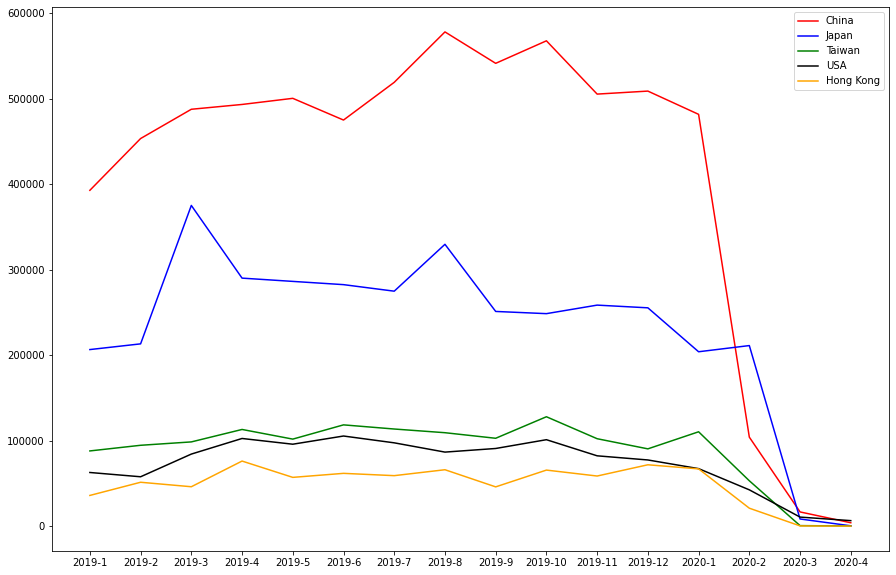

In [43]:
import matplotlib.pyplot as plt

agedfC = agedf.loc[agedf['nation']=="China"]
agedfJ = agedf.loc[agedf['nation']=="Japan"]
agedfT = agedf.loc[agedf['nation']=="Taiwan"]
agedfU = agedf.loc[agedf['nation']=="USA"]
agedfH = agedf.loc[agedf['nation']=="Hong Kong"]

fig,ax = plt.subplots(figsize = (15,10))

x = agedfC['date']
y = agedfC['visitor']
ax.plot(x, y, label='China', color='red')
y = agedfJ['visitor']
ax.plot(x, y, label='Japan', color='blue')
y = agedfT['visitor']
ax.plot(x, y, label='Taiwan', color='green')
y = agedfU['visitor']
ax.plot(x, y, label='USA', color='black')
y = agedfH['visitor']
ax.plot(x, y, label='Hong Kong', color='orange')

ax.legend()
plt.show()

19년 1월부터 20년 4월까지 모든 방문객의 국가 비율을 pieplot으로 그렸다.

([<matplotlib.patches.Wedge at 0x7f0b8adbcdd0>,
 [Text(0.5339009399200487, 0.9617430978969844, 'China'),
  Text(-1.0042123876542444, 0.4489515346691242, 'Japan'),
  Text(-1.0125712235343947, -0.4297668173208106, 'Taiwan'),
  Text(-0.7520934256760301, -0.8027175587059834, 'USA'),
  Text(-0.4677862665380963, -0.9955782283870762, 'Hong Kong'),
  Text(0.6468343591402796, -0.8897220418959979, 'Else')],
 [Text(0.29121869450184473, 0.524587144307446, '33.9%'),
  Text(-0.5477522114477695, 0.24488265527406772, '18.9%'),
  Text(-0.5523115764733061, -0.2344182639931694, '7.3%'),
  Text(-0.4102327776414709, -0.43784594111235453, '6.0%'),
  Text(-0.25515614538441617, -0.5430426700293143, '4.0%'),
  Text(0.3528187413492434, -0.4853029319432715, '30.0%')])

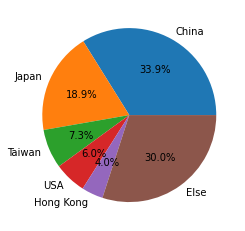

In [7]:
Cv = agedf[agedf['nation']=="China"].sum()['visitor']
Jv = agedf[agedf['nation']=="Japan"].sum()['visitor']
Tv = agedf[agedf['nation']=="Taiwan"].sum()['visitor']
Uv = agedf[agedf['nation']=="USA"].sum()['visitor']
Hv = agedf[agedf['nation']=="Hong Kong"].sum()['visitor']
Ev = agedf['visitor'].sum() - (Cv + Jv + Tv + Uv + Hv)

subjects = ["China", "Japan", "Taiwan", "USA", "Hong Kong", "Else"]
scores = [Cv, Jv, Tv, Uv, Hv, Ev]

plt.pie(scores, labels = subjects, autopct = '%1.1f%%')


관광객들의 나이 분포를 나타낸 pieplot을 그린 결과 20대와 30대가 전체 관광객의 절반을 넘었다.

([<matplotlib.patches.Wedge at 0x7f0b8ad35b10>,
 [Text(1.0928149540134522, 0.35812773738510734, 'age0-20'),
  Text(0.11006546235561698, 1.1447207493517555, 'age21-30'),
  Text(-1.1450757279688695, 0.10630887647117727, 'age31-40'),
  Text(-0.4737402788254761, -1.0478884235539394, 'age41-50'),
  Text(0.553259000274521, -1.0081688740559478, 'age51-60'),
  Text(1.090040835893689, -0.3664846191645537, 'age61')],
 [Text(0.6176780174858643, 0.20242002547853888, '10.1%'),
  Text(0.06221091350534872, 0.6470160757205574, '26.8%'),
  Text(-0.6472167158084913, 0.06008762583153497, '23.3%'),
  Text(-0.26776624455352993, -0.5922847611391832, '16.1%'),
  Text(0.3127116088508162, -0.5698345809881444, '13.4%'),
  Text(0.6161100376790416, -0.20714348039735642, '10.3%')])

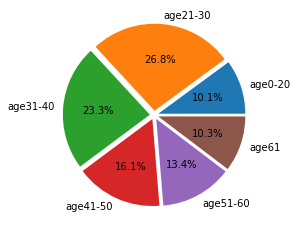

In [8]:
a1 = agedf['age0-20'].sum()
a2 = agedf['age21-30'].sum()
a3 = agedf['age31-40'].sum()
a4 = agedf['age41-50'].sum()
a5 = agedf['age51-60'].sum()
a6 = agedf['age61'].sum()
subjects = ["age0-20", "age21-30", "age31-40", "age41-50", "age51-60", "age61"]
scores = [a1, a2, a3, a4, a5, a6]
plt.pie(scores, labels = subjects, explode = (0.05,0.05,0.05,0.05,0.05,0.05), autopct = '%1.1f%%')

2019년의 방문객의 목적을 알아보기 위해 2020 이후의 데이터를 삭제한 데이터프레임을 사용하여 pieplot을 만들었고 tourism을 제외한 다른 목적은 매우 적어 눈에 띄지 못해 legend를 생성했다. 

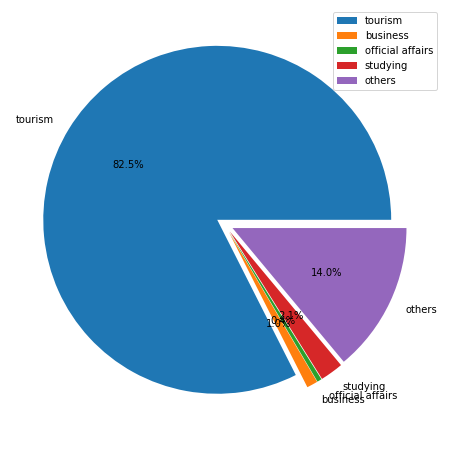

In [50]:
purdf = purposedf[purposedf['date']>'2020'].index
dfpurpose = purposedf.drop(purdf)

p1 = dfpurpose['tourism'].sum()
p2 = dfpurpose['business'].sum()
p3 = dfpurpose['official affairs'].sum()
p4 = dfpurpose['studying'].sum()
p5 = dfpurpose['others'].sum()



subjects = ['tourism', 'business', 'official affairs', 'studying', 'others']
scores = [p1, p2, p3, p4, p5]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax.pie(scores,labels = subjects, explode = (0.05,0.05,0.05,0.05,0.05), autopct = '%1.1f%%')
plt.legend()
plt.show()